#Bibliotecas
Se utilizaran la siguiente biblitocas para la creacion y experimentacion del proyecto:
* Numpy: es una libreria la cual utilizaremos para crear matrices, en este caso el mapa del simulador.
* seaborn: es la libreria que se encargara de graficar la matriz dandoles los colores a los azulejos.
* Matplotlib: es otra libreria grafica que creara la figura para poder visualizarla. 
* Time: libreria time sera utilizada para extraer el tiempo que el algoritmo demora en resolver sus retos.
* Random: libreria que genera valores aleatorios

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time
from collections import deque

#TABLERO
######Creamos la clase padre que es el tablero. En donde recibira la varaible del tamaño del tablero.
######Una vez recibida la variable generaremos la matriz del tablero, en donde inicialmente se llenara todo de 0.
######Luego que generamos el tablero definiremos las posiciones de los jugadores y les daremos un valor distinto de 0.
######-> 1 => vALOR DEL PRIMER JUGADOR
######-> 2 => VALOR DEL SEGUNDO JUGADOR
######-> 3 => VALOR DEL TERCER JUGADOR
######-> 4 => VALOR DEL CUARTO JUGADOR
######Despues de asignar los valores y posiciones de los jugadores, crearemos la funcion que permite mostrar el tablero de una manera visual mas optima, diferenciando cada valor de la matriz de un color y un tamaño considerable.
######Por ultimo crearemos funciones retornadoras que devoleran la matriz del tablero, el tamaño del tablero y finalmente las posiciones de los jugadores.

In [ ]:
class Tablero:
  
  def __init__(self, n : int):
    self.tamanio = n
    self.matriz = np.zeros(shape=(self.tamanio,self.tamanio)).astype(int)
    self.pos_jugador = (-1,-1)
    self.pos_jugador_segundo = (-1,-1)
    self.pos_jugador_tercero = (-1,-1)
    self.pos_jugador_cuarto = (-1,-1)

  def Generar_Tablero(self):

    pos_x = self.tamanio // 2
    pos_y = 0

    pos_x_p2 = (self.tamanio // 2) + 1
    pos_y_p2 = self.tamanio - 1

    pos_x_p3 = 0
    pos_y_p3 = self.tamanio // 2

    pos_x_p4 = self.tamanio - 1
    pos_y_p4 = self.tamanio // 2

    self.matriz[pos_y,pos_x] = 1
    self.matriz[pos_y_p2,pos_x_p2] = 2
    self.matriz[pos_y_p3,pos_x_p3] = 3
    self.matriz[pos_y_p4,pos_x_p4] = 4

    self.pos_jugador = (pos_y,pos_x)
    self.pos_jugador_segundo = (pos_y_p2,pos_x_p2)
    self.pos_jugador_tercero = (pos_y_p3,pos_x_p3)
    self.pos_jugador_cuarto = (pos_y_p4,pos_x_p4)

    return self.matriz

  def Dibujar_Tablero(self):
    plt.figure(figsize=(np.size(self.matriz,0),np.size(self.matriz,1)))
    sns.heatmap(self.matriz, linewidths=.1, linecolor='white',annot=False, cmap='magma', yticklabels=False,xticklabels=False, cbar=False, square=True);
    sns.heatmap(self.matriz, linewidths=.1, linecolor='white',annot=True, cmap='magma', yticklabels=False,xticklabels=False, cbar=False, square=True,
                mask=np.array(self.matriz)<0);
    plt.show()

  def get_pos(self):
    return self.pos_jugador
  
  def get_pos_segundo(self):
    return self.pos_jugador_segundo

  def get_pos_tercero(self):
    return self.pos_jugador_tercero

  def get_pos_cuarto(self):
    return self.pos_jugador_cuarto

  def get_tamanio(self):
    return self.tamanio

  def get_matriz(self):
    return self.matriz

#GRAFO
######Creamos la entidad grafo, que recibe como parametro inicial el tablero.
######Una vex recibido el tablero, crearemos dos listas que tendran los valores para que los jugadores hagan sus movimientos.
```
    self.Movimientos_Fila = [1,-1,0,0,1,1,-1,-1]
    self.Movimientos_Columna = [0,0,1,-1,-1,1,-1,1]
```
######Crearemos una lista que tendra los movimientos a visualizar:
```
    self.Movimientos = list("DURLHPJK")
```
######Donde cada letra es:
######D => Abajo
######U => Arriba
######L => Izquierda
######R => Derecha
######H => Diagonal izquierda hacia abajo
######P => Diagonal derecha hacia abajo
######J => Diagonal izquierda hacia arriba
######K => Diagonal derecha hacia arriba

######Crearemos las matrices que seran los visitados, para conocer si los jugadores visitaron cierta posicion o no.

```
    self.visitados = [[-1 for i in range(self.mesa.get_tamanio())] for j in range(self.mesa.get_tamanio())]
    self.visitados_p2 = [[-1 for i in range(self.mesa.get_tamanio())] for j in range(self.mesa.get_tamanio())]
    self.visitados_p3 = [[-1 for i in range(self.mesa.get_tamanio())] for j in range(self.mesa.get_tamanio())]
    self.visitados_p4 = [[-1 for i in range(self.mesa.get_tamanio())] for j in range(self.mesa.get_tamanio())]
```

######Definimos las Variables que tendran las posiciones iniciales de cada uno de los jugadores como tambien otras variables que seran su meta de cada uno de los jugadores

```
    pos = self.mesa.get_tamanio() // 2
    pos_p2 = self.mesa.get_tamanio() // 2
    pos_p3 = self.mesa.get_tamanio() // 2
    pos_p4 = self.mesa.get_tamanio() // 2
```

######Luego de definir los paremetros iniciales. Pasamos a crear las funciones de validacion, en el cual su principal funcion es retornar que el jugador cuando se mueva este dentro de los parametros del tablero, que cuando se mueva y se tope cun un jugador no pueda avanzar y analize otra ruta, que su matriz de visitados sea "-1". Osea que no haiga visitado el casillero que se va a mover. Esta funcion va ser para cada jugador y se crea diferentes. Porque, cada matriz de visitados es diferente.

```
  def validacion(self,fila,columna):
    tamanio = self.mesa.get_tamanio()
    return (fila >= 0) and (fila < tamanio) and (columna >= 0) and (columna < tamanio) \
    and (self.matriz[fila][columna] != 1)  and (self.matriz[fila][columna] != 2) \
    and (self.matriz[fila][columna] != 3) and (self.matriz[fila][columna] != 4) \
    and (self.matriz[fila][columna] != 5) and (self.visitados[fila][columna] == -1) \
    and (self.visitados_p2[fila][columna] == -1)
```

######Despues de definir las funciones de las validaciones creamos la funciones de las paredes. Las paredes se colocaran de manera aleatoria en cada fila, donde se bloqueara los caminos de 2, sean hjorizontal, vertical y diagonales.

######Despues de definir las paredes pasamos a la funcion BFS. En esta funcion primero llamamos a la funcion de la pared, luego de llamar ponemos que la matriz visitado de cada jugador va ser "-2", significa que fue visitado.

```
    self.visitados[self.inicio[0]][self.inicio[1]] = -2
    self.visitados_p2[self.inicio_p2[0]][self.inicio_p2[1]] = -2
    self.visitados_p3[self.inicio_p3[0]][self.inicio_p3[1]] = -2
    self.visitados_p4[self.inicio_p4[0]][self.inicio_p4[1]] = -2
```

######Creamos una funcion que reconstruya el camino por donde recorrio el jugadro, esta funcion sera retroceder desde el punto final llegado hasta la posicion inicial del jugador, cuando regresando por el camino deja los rastros de los movimientos. Y al final retorna la cantidad de movimientos que se hizo y tambien almacena que movimientos hizo el jugador.

```
  def Reconstruir_Camino(self):
    fila,columna = self.destino_01
    while self.visitados[fila][columna] >= 0:
      i = self.visitados[fila][columna]
      self.mov_p1.appendleft(self.Movimientos[i])
      fila -= self.Movimientos_Fila[i]
      columna -= self.Movimientos_Columna[i]
    self.camino_p1 = len(self.mov_p1)
```

######Sabiendo que movimientos hizo el jugador creamos una funcion que muestre el camino por donde paso, dejando un rastro con su valor respectivo. Esta funcion recibe el parametro del jugador que gano. La razon de esto es porque si mostraramos el camino de todos a la vez no distinguiriamos quien gano y no entenderiamos el tablero.

```
  def Mostrar_Camino(self, ganador):
    if ganador == 1:
      fila,columna = self.destino_01
      mov = deque()
      while self.visitados[fila][columna] >= 0:
        i = self.visitados[fila][columna]
        mov.appendleft(self.Movimientos[i])
        self.matriz[fila][columna] = 1
        fila -= self.Movimientos_Fila[i]
        columna -= self.Movimientos_Columna[i]
```

######Comenzamos hacer el BFS, comprobamos que la cola no este vacia y empezamos a recorrer, luego creamos un for para que recorra los la lista de movientos, y vistamos los vecinos, cuando nos vamos al vecino llamos a la funcion Validacion para que compruebe que el vecino este dentro de los parametros establecios y si cumple la nueva posicion se introduce a la cola.

```
    while len(cola):
      fila, columna = cola.popleft()
      for i in range(8):
        nx = fila + self.Movimientos_Fila[i] 
        ny = columna + self.Movimientos_Columna[i] 
        if self.validacion(nx,ny):
          self.visitados[nx][ny] = i
          cola.append((nx,ny))
```

######Una vez hecho todos los procesos creamos una funcion ganadora, lo primero que haremos es que reconstruya el camino que realizo cada jugador. Cuando se llaman a los jugadores sabres la cantidad de movimientos que realizo cada uno. Sabiendo los movimientos los almacenamos en una lista. 

```
    ganador = [self.camino_p1, self.camino_p2, self.camino_p3, self.camino_p4]
    minimo = min(ganador)
```
######Una vez sacamos el camino minimo del jugador ganadador, mostramos la cantidad de movimiento que realizo como decimos quien es el jugador que gano. Y finalmente mostramos la ruta rexorrida.

```
    if minimo == self.camino_p1:
      print("\n\n----------EL GANADOR ES EL PRIMER JUGADOR--------------------")
      print("La cantidad de movimientos realizados es: ", self.camino_p1)
      self.Mostrar_Camino(1)  
    
    elif minimo == self.camino_p2:
      print("\n\n----------EL GANADOR ES EL SEGUNDO JUGADOR--------------------")
      print("La cantidad de movimientos realizados es: ", self.camino_p2)
      self.Mostrar_Camino(2) 

    elif minimo == self.camino_p3:
      print("\n\n----------EL GANADOR ES EL TERCER JUGADOR--------------------")
      print("La cantidad de movimientos realizados es: ", self.camino_p3)
      self.Mostrar_Camino(3)

    elif minimo == self.camino_p4:
      print("\n\n----------EL GANADOR ES EL CUARTO JUGADOR--------------------")
      print("La cantidad de movimientos realizados es: ", self.camino_p4)
      self.Mostrar_Camino(4)
```


In [ ]:
class Grafo:
  def __init__(self, mesa : Tablero):
    self.mesa = mesa
    self.Movimientos_Fila = [1,-1,0,0,1,1,-1,-1]
    self.Movimientos_Columna = [0,0,1,-1,-1,1,-1,1]
    self.Movimientos = list("DURLHPJK")
    self.matriz = self.mesa.get_matriz()
    self.mov_p1 = deque()
    self.mov_p2 = deque()
    self.mov_p3 = deque()
    self.mov_p4 = deque()

    self.visitados = [[-1 for i in range(self.mesa.get_tamanio())] for j in range(self.mesa.get_tamanio())]
    self.visitados_p2 = [[-1 for i in range(self.mesa.get_tamanio())] for j in range(self.mesa.get_tamanio())]
    self.visitados_p3 = [[-1 for i in range(self.mesa.get_tamanio())] for j in range(self.mesa.get_tamanio())]
    self.visitados_p4 = [[-1 for i in range(self.mesa.get_tamanio())] for j in range(self.mesa.get_tamanio())]

    self.inicio = self.mesa.get_pos()
    self.inicio_p2 = self.mesa.get_pos_segundo()
    self.inicio_p3 = self.mesa.get_pos_tercero()
    self.inicio_p4 = self.mesa.get_pos_cuarto()

    pos = self.mesa.get_tamanio() // 2
    pos_p2 = self.mesa.get_tamanio() // 2
    pos_p3 = self.mesa.get_tamanio() // 2
    pos_p4 = self.mesa.get_tamanio() // 2

    self.destino_01 = (self.mesa.get_tamanio() - 1, pos)
    self.destino_02 = (0, pos_p2 + 2)
    self.destino_03 = (pos_p3 + 2, self.mesa.get_tamanio() - 1)
    self.destino_04 = (pos_p4 + 1, 0)

    self.camino_p1 = 0
    self.camino_p2 = 0
    self.camino_p3 = 0
    self.camino_p4 = 0

  def validacion(self,fila,columna):
    tamanio = self.mesa.get_tamanio()
    return (fila >= 0) and (fila < tamanio) and (columna >= 0) and (columna < tamanio) \
    and (self.matriz[fila][columna] != 1)  and (self.matriz[fila][columna] != 2) \
    and (self.matriz[fila][columna] != 3) and (self.matriz[fila][columna] != 4) \
    and (self.matriz[fila][columna] != 5) and (self.visitados[fila][columna] == -1) \
    and (self.visitados_p2[fila][columna] == -1)

  def validacion_p2(self,fila,columna):
    tamanio = self.mesa.get_tamanio()
    return (fila >= 0) and (fila < tamanio) and (columna >= 0) and (columna < tamanio) \
    and (self.matriz[fila][columna] != 1)  and (self.matriz[fila][columna] != 2) \
    and (self.matriz[fila][columna] != 3) and (self.matriz[fila][columna] != 4) \
    and (self.matriz[fila][columna] != 5) and (self.visitados_p2[fila][columna] == -1)
  
  def validacion_p3(self,fila,columna):
    tamanio = self.mesa.get_tamanio()
    return (fila >= 0) and (fila < tamanio) and (columna >= 0) and (columna < tamanio) \
    and (self.matriz[fila][columna] != 1)  and (self.matriz[fila][columna] != 2) \
    and (self.matriz[fila][columna] != 3) and (self.matriz[fila][columna] != 4) \
    and (self.matriz[fila][columna] != 5) and (self.visitados_p3[fila][columna] == -1)

  def validacion_p4(self,fila,columna):
    tamanio = self.mesa.get_tamanio()
    return (fila >= 0) and (fila < tamanio) and (columna >= 0) and (columna < tamanio) \
    and (self.matriz[fila][columna] != 1)  and (self.matriz[fila][columna] != 2) \
    and (self.matriz[fila][columna] != 3) and (self.matriz[fila][columna] != 4) \
    and (self.matriz[fila][columna] != 5) and (self.visitados_p4[fila][columna] == -1)


  def Reconstruir_Camino(self):
    fila,columna = self.destino_01
    while self.visitados[fila][columna] >= 0:
      i = self.visitados[fila][columna]
      self.mov_p1.appendleft(self.Movimientos[i])
      fila -= self.Movimientos_Fila[i]
      columna -= self.Movimientos_Columna[i]
    self.camino_p1 = len(self.mov_p1)

    f_p2,c_p2 = self.destino_02
    while self.visitados_p2[f_p2][c_p2] >= 0:
      i = self.visitados_p2[f_p2][c_p2]
      self.mov_p2.appendleft(self.Movimientos[i])
      f_p2 -= self.Movimientos_Fila[i]
      c_p2 -= self.Movimientos_Columna[i]
    self.camino_p2 = len(self.mov_p2)

    f_p3,c_p3 = self.destino_03
    while self.visitados_p3[f_p3][c_p3] >= 0:
      i = self.visitados_p3[f_p3][c_p3]
      self.mov_p3.appendleft(self.Movimientos[i])
      f_p3 -= self.Movimientos_Fila[i]
      c_p3 -= self.Movimientos_Columna[i]
    self.camino_p3 = len(self.mov_p3)    

    f_p4,c_p4 = self.destino_04
    while self.visitados_p4[f_p4][c_p4] >= 0:
      i = self.visitados_p4[f_p4][c_p4]
      self.mov_p4.appendleft(self.Movimientos[i])
      f_p4 -= self.Movimientos_Fila[i]
      c_p4 -= self.Movimientos_Columna[i]
    self.camino_p4 = len(self.mov_p4)    

  def Mostrar_Camino(self, ganador):
    if ganador == 1:
      fila,columna = self.destino_01
      mov = deque()
      while self.visitados[fila][columna] >= 0:
        i = self.visitados[fila][columna]
        mov.appendleft(self.Movimientos[i])
        self.matriz[fila][columna] = 1
        fila -= self.Movimientos_Fila[i]
        columna -= self.Movimientos_Columna[i]
    elif ganador == 2:
      fila,columna = self.destino_02
      mov = deque()
      while self.visitados_p2[fila][columna] >= 0:
        i = self.visitados_p2[fila][columna]
        mov.appendleft(self.Movimientos[i])
        self.matriz[fila][columna] = 2
        fila -= self.Movimientos_Fila[i]
        columna -= self.Movimientos_Columna[i]
    elif ganador == 3:
      fila,columna = self.destino_03
      mov = deque()
      while self.visitados_p3[fila][columna] >= 0:
        i = self.visitados_p3[fila][columna]
        mov.appendleft(self.Movimientos[i])
        self.matriz[fila][columna] = 3
        fila -= self.Movimientos_Fila[i]
        columna -= self.Movimientos_Columna[i]
    elif ganador == 4:
      fila,columna = self.destino_04
      mov = deque()
      while self.visitados_p4[fila][columna] >= 0:
        i = self.visitados_p4[fila][columna]
        mov.appendleft(self.Movimientos[i])
        self.matriz[fila][columna] = 4
        fila -= self.Movimientos_Fila[i]
        columna -= self.Movimientos_Columna[i]        

  def Paredes(self):
    j = self.mesa.get_tamanio() - 1
    for i in range(1,j):
      pos = self.mesa.get_tamanio() - 2

      pos1 = random.randint(1, pos - 1)
      pos2 = random.randint(1, pos - 2)

      self.matriz[i][random.randint(1, pos1)] = 5
      self.matriz[i][random.randint(1, pos1 + 1)] = 5

      self.matriz[random.randint(1, pos1)][i] = 5
      self.matriz[random.randint(1, pos1 + 1)][i] = 5

  def BFS(self):
    self.visitados[self.inicio[0]][self.inicio[1]] = -2
    self.visitados_p2[self.inicio_p2[0]][self.inicio_p2[1]] = -2
    self.visitados_p3[self.inicio_p3[0]][self.inicio_p3[1]] = -2
    self.visitados_p4[self.inicio_p4[0]][self.inicio_p4[1]] = -2

    cola = deque([self.inicio])
    cola_p2 = deque([self.inicio_p2])
    cola_p3 = deque([self.inicio_p3])
    cola_p4 = deque([self.inicio_p4])

    self.Paredes()
    
    while len(cola):
      fila, columna = cola.popleft()
      for i in range(8):
        nx = fila + self.Movimientos_Fila[i] 
        ny = columna + self.Movimientos_Columna[i] 
        if self.validacion(nx,ny):
          self.visitados[nx][ny] = i
          cola.append((nx,ny))

    while len(cola_p2):
      f_p2,c_p2 = cola_p2.popleft()
      for i in range(8):
        nx_p2 = f_p2 + self.Movimientos_Fila[i]
        ny_p2 = c_p2 + self.Movimientos_Columna[i] 
        if self.validacion_p2(nx_p2,ny_p2):
          self.visitados_p2[nx_p2][ny_p2] = i
          cola_p2.append((nx_p2,ny_p2))   

    while len(cola_p3):
      f_p3,c_p3 = cola_p3.popleft()
      for i in range(8):
        nx_p3 = f_p3 + self.Movimientos_Fila[i]
        ny_p3 = c_p3 + self.Movimientos_Columna[i] 
        if self.validacion_p3(nx_p3,ny_p3):
          self.visitados_p3[nx_p3][ny_p3] = i
          cola_p3.append((nx_p3,ny_p3))

    while len(cola_p4):
      f_p4,c_p4 = cola_p4.popleft()
      for i in range(8):
        nx_p4 = f_p4 + self.Movimientos_Fila[i]
        ny_p4 = c_p4 + self.Movimientos_Columna[i] 
        if self.validacion_p4(nx_p4,ny_p4):
          self.visitados_p4[nx_p4][ny_p4] = i
          cola_p4.append((nx_p4,ny_p4))           

  def Ganador(self):
    self.Reconstruir_Camino()
    ganador = [self.camino_p1, self.camino_p2, self.camino_p3, self.camino_p4]
    minimo = min(ganador)
    
    if minimo == self.camino_p1:
      print("\n\n----------EL GANADOR ES EL PRIMER JUGADOR--------------------")
      print("La cantidad de movimientos realizados es: ", self.camino_p1)
      self.Mostrar_Camino(1)  
    
    elif minimo == self.camino_p2:
      print("\n\n----------EL GANADOR ES EL SEGUNDO JUGADOR--------------------")
      print("La cantidad de movimientos realizados es: ", self.camino_p2)
      self.Mostrar_Camino(2) 

    elif minimo == self.camino_p3:
      print("\n\n----------EL GANADOR ES EL TERCER JUGADOR--------------------")
      print("La cantidad de movimientos realizados es: ", self.camino_p3)
      self.Mostrar_Camino(3)

    elif minimo == self.camino_p4:
      print("\n\n----------EL GANADOR ES EL CUARTO JUGADOR--------------------")
      print("La cantidad de movimientos realizados es: ", self.camino_p4)
      self.Mostrar_Camino(4)

    print("\n\n---------------------MOVIMIENTOS REALIZADOS---------------------------")
    print("Movimientos realizados por el primer jugador => ", ''.join(self.mov_p1)) 
    print("Movimientos realizados por el segundo jugador => ", ''.join(self.mov_p2))
    print("Movimientos realizados por el tercer jugador => ", ''.join(self.mov_p3))    
    print("Movimientos realizados por el cuarto jugador => ", ''.join(self.mov_p4)) 

  def get_destino(self):
    return self.destino_01
  
  def get_destino_p2(self):
    return self.destino_02

  def get_destino_p3(self):
    return self.destino_03

  def get_destino_p4(self):
    return self.destino_04

#TIEMPO
######Cremos una funcion que nos permitira saber el tiempo ejecutado de todo el BFS y la generacion del tablero, como tambien para saber cuanto demoro en ganar el jugador.

In [ ]:
def Tiempo(main,tamanio):
  inicio = time.time()
  main(tamanio)
  final = time.time()
  return (final - inicio) * 1000

#MAIN
######Esta es la funcion principal donde llamaremos y definiremos todo lo que se tiene que hacer. Esta funcion recibe como parametro el tamaño de la tabla en la cual servira para asignarla a la clase tablero. De la clase tablero tambien mostraremos las posiciones iniciales de los jugadores para conocer su punto de incio de cada uno de ellos, como tambien mostraremos la matriz inicial.

######Luego llamamos a la clase Grafo, en donde recibira el paremetro de la clase tablero u, una vez asignada llamamos a la funcion BFS, en donde se realiza todo el trabajo. Por ultimo llamamos a la funcion ganadora, el cual nos dira quien de los jugadores fue el ganador.

######Tambien mostraremos el moviento realizado por cada jugador. 

######NOTA: Solo mostramos el movimiento del jugador que gano en el tablero.

In [ ]:
def main(tamanio):
  mesa = Tablero(tamanio)
  mesa.Generar_Tablero()
  mesa.Dibujar_Tablero()

  bfs = Grafo(mesa)
  print("\n\n------------------DATOS GENERALES---------------------------")
  print("La posicion del primer jugador es => ", mesa.get_pos())
  print("La posicion del segundo jugador es => ", mesa.get_pos_segundo())
  print("La posicion del tercero jugador es => ", mesa.get_pos_tercero())
  print("La posicion del cuarto jugador es => ", mesa.get_pos_cuarto())
  print("El tamanio del tablero es => ", mesa.get_tamanio())
  print("El destino del primer jugador es => ", bfs.get_destino())
  print("El destino del segundo jugador es => ", bfs.get_destino_p2())
  print("El destino del tercero jugador es => ", bfs.get_destino_p3())
  print("El destino del cuarto jugador es => ", bfs.get_destino_p4())

  bfs.BFS()
  bfs.Ganador()

  print("\n\n\n-----------------------------CAMINO RECORRIDO---------------------------")
  mesa.Dibujar_Tablero()

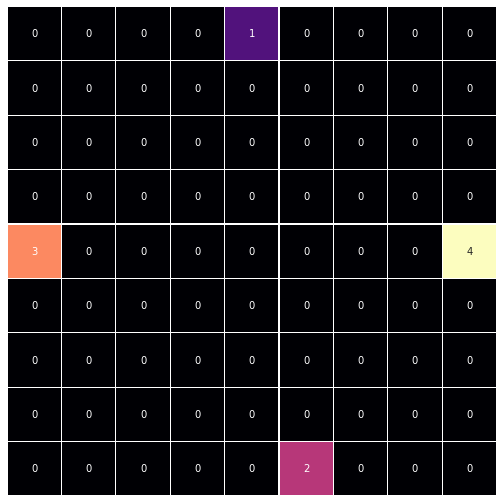



------------------DATOS GENERALES---------------------------
La posicion del primer jugador es =>  (0, 4)
La posicion del segundo jugador es =>  (8, 5)
La posicion del tercero jugador es =>  (4, 0)
La posicion del cuarto jugador es =>  (4, 8)
El tamanio del tablero es =>  9
El destino del primer jugador es =>  (8, 4)
El destino del segundo jugador es =>  (0, 6)
El destino del tercero jugador es =>  (6, 8)
El destino del cuarto jugador es =>  (5, 0)


----------EL GANADOR ES EL PRIMER JUGADOR--------------------
La cantidad de movimientos realizados es:  8


---------------------MOVIMIENTOS REALIZADOS---------------------------
Movimientos realizados por el primer jugador =>  DHPPDHHP
Movimientos realizados por el segundo jugador =>  UJUKUKUU
Movimientos realizados por el tercer jugador =>  DPRPPKRRK
Movimientos realizados por el cuarto jugador =>  HHHHJJLJ



-----------------------------CAMINO RECORRIDO---------------------------


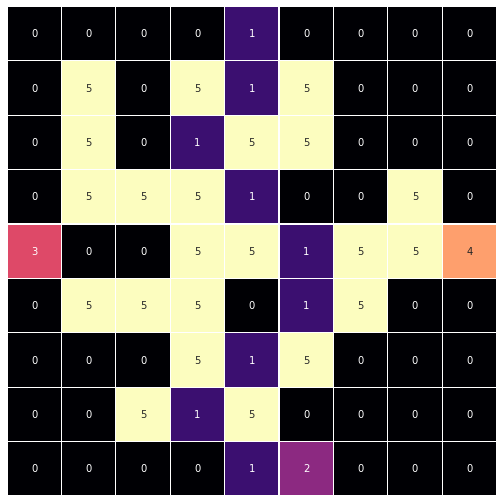



El tiempo es =>  558.1250190734863 segundos


In [ ]:
print("\n\nEl tiempo es => ", Tiempo(main,9), "segundos")